In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

In [2]:
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [6]:
ops.reset_default_graph()
with tf.Session() as sess:
    lr = 0.25
    bs = 50
    it = 1500
    
    x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
    y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
    
    A = tf.Variable(tf.random_normal(shape=[1, 1]))
    b = tf.Variable(tf.random_normal(shape=[1, 1]))
    model_output = tf.add(tf.matmul(x_data, A), b)
    demming_numerator = tf.abs(tf.subtract(y_target, tf.add(tf.matmul(x_data, A), b)))
    demming_denominator = tf.sqrt(tf.add(tf.square(A), 1))
    loss = tf.reduce_mean(tf.truediv(demming_numerator, demming_denominator))
    
    init = tf.global_variables_initializer()
    sess.run(init)
    
    my_opt = tf.train.GradientDescentOptimizer(lr)
    train_step = my_opt.minimize(loss)
    
    loss_vec = []
    for i in range(it):
        rand_index = np.random.choice(len(x_vals), size=bs)
        rand_x = np.transpose([x_vals[rand_index]])
        rand_y = np.transpose([y_vals[rand_index]])
        sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        loss_vec.append(temp_loss)
        if (i + 1) % 100 == 0:
            print('Step #' + str(i + 1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
            print('Loss = ' + str(temp_loss))
    
    [slope] = sess.run(A)
    [y_intercept] = sess.run(b)

Step #100 A = [[3.6118543]] b = [[0.9775586]]
Loss = 0.50650465
Step #200 A = [[3.1907508]] b = [[1.5648339]]
Loss = 0.53944975
Step #300 A = [[2.6623826]] b = [[2.3035345]]
Loss = 0.43885696
Step #400 A = [[1.9610522]] b = [[3.2663515]]
Loss = 0.35798535
Step #500 A = [[1.1295817]] b = [[4.5170975]]
Loss = 0.26625022
Step #600 A = [[0.99495494]] b = [[4.628428]]
Loss = 0.26333615
Step #700 A = [[0.9423726]] b = [[4.636665]]
Loss = 0.29955137
Step #800 A = [[0.97919685]] b = [[4.558765]]
Loss = 0.2810499
Step #900 A = [[1.0483657]] b = [[4.5895004]]
Loss = 0.2660002
Step #1000 A = [[1.0094776]] b = [[4.6001086]]
Loss = 0.28986007
Step #1100 A = [[1.0071746]] b = [[4.6886444]]
Loss = 0.24012741
Step #1200 A = [[1.0130152]] b = [[4.588716]]
Loss = 0.27710104
Step #1300 A = [[0.9770413]] b = [[4.587991]]
Loss = 0.25924325
Step #1400 A = [[1.0302942]] b = [[4.638792]]
Loss = 0.27341452
Step #1500 A = [[1.003881]] b = [[4.6218057]]
Loss = 0.28888202


In [7]:
best_fit = []
for i in x_vals:
    best_fit.append(slope * i + y_intercept)

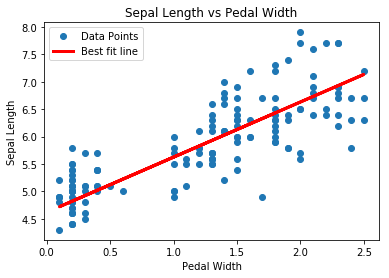

In [9]:
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()